In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from google.colab import files

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IN_youtube_trending_data.csv")
print("✅ Dataset Loaded")
print("Shape:", df.shape)
print(df.head())

✅ Dataset Loaded
Shape: (251277, 16)
      video_id                                              title  \
0  Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1  x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2  KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3  UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4  WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   

            publishedAt                 channelId    channelTitle  categoryId  \
0  2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA    FoxStarHindi          24   
1  2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g  Rehaan Records          10   
2  2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg  Diljit Dosanjh          10   
3  2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA        T-Series          10   
4  2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA   VYRLOriginals          10   

          trending_date                                      

In [ ]:
print(df.columns)


Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


In [ ]:
print("Please upload the category JSON file (e.g. IN_category_id.json or US_category_id.json)")
uploaded = files.upload()

Please upload the category JSON file (e.g. IN_category_id.json or US_category_id.json)


Saving US_category_id.json to US_category_id.json


In [ ]:
json_file = list(uploaded.keys())[0]
with open(json_file, "r") as f:
    cat_data = json.load(f)

cat_map = {int(item["id"]): item["snippet"]["title"] for item in cat_data["items"]}

In [ ]:
df['category_name'] = df['categoryId'].map(cat_map)

In [ ]:
numeric_cols = ['view_count', 'likes', 'dislikes', 'comment_count']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=numeric_cols, inplace=True)

print("✅ Data cleaned")
print(df.info())


✅ Data cleaned
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251277 entries, 0 to 251276
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           251277 non-null  object
 1   title              251277 non-null  object
 2   publishedAt        251277 non-null  object
 3   channelId          251277 non-null  object
 4   channelTitle       251276 non-null  object
 5   categoryId         251277 non-null  int64 
 6   trending_date      251277 non-null  object
 7   tags               251277 non-null  object
 8   view_count         251277 non-null  int64 
 9   likes              251277 non-null  int64 
 10  dislikes           251277 non-null  int64 
 11  comment_count      251277 non-null  int64 
 12  thumbnail_link     251277 non-null  object
 13  comments_disabled  251277 non-null  bool  
 14  ratings_disabled   251277 non-null  bool  
 15  description        231822 non-null  object
 16  categ

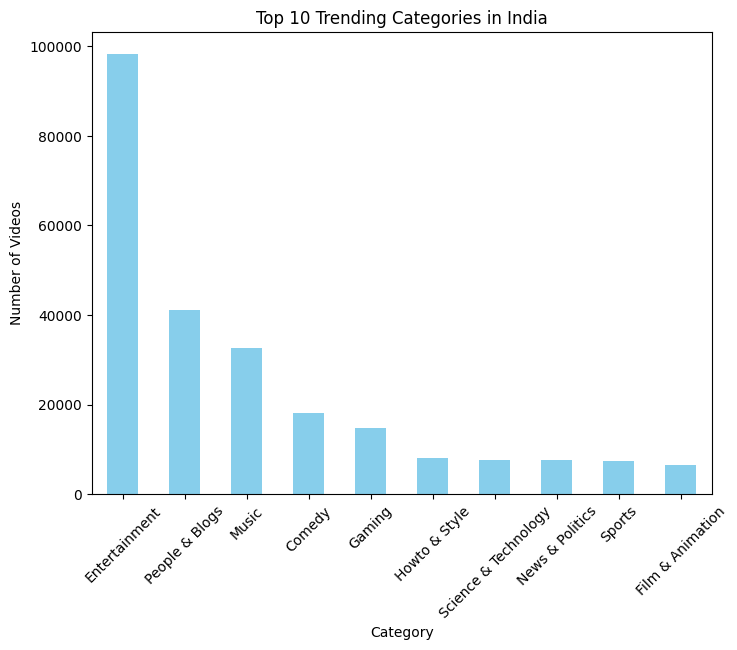

In [ ]:
# Top 10 trending categories
plt.figure(figsize=(8,6))
df['category_name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Trending Categories in India')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

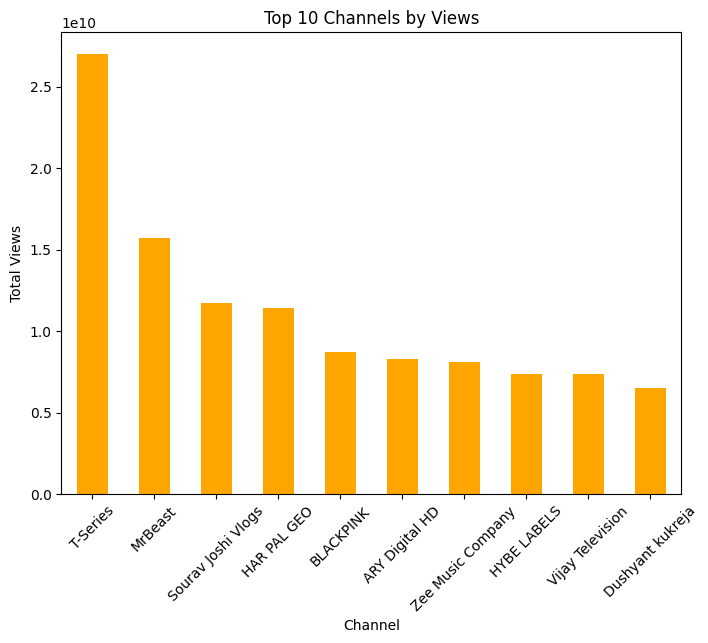

In [ ]:
# Top 10 channels by total views
top_channels = df.groupby('channelTitle')['view_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
top_channels.plot(kind='bar', color='orange')
plt.title('Top 10 Channels by Views')
plt.xlabel('Channel')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Views vs Likes correlation
plt.figure(figsize=(10,6))
sns.scatterplot(x='view_count', y='likes', data=df, alpha=0.5)
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

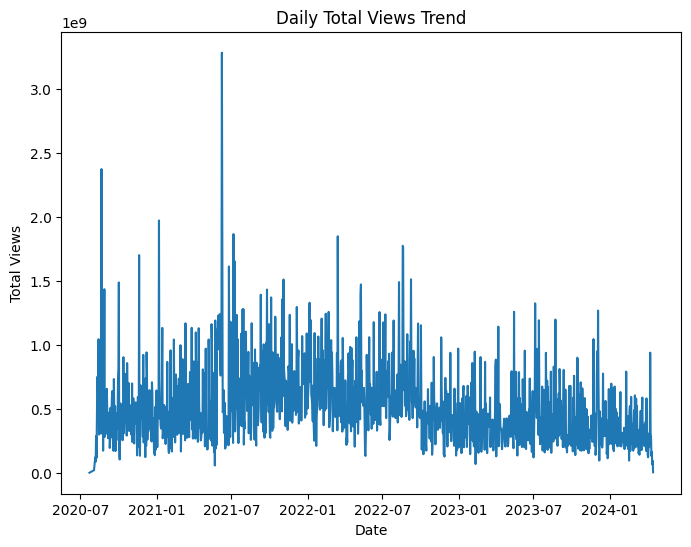

In [ ]:
# Trend of views over time
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
daily_views = df.groupby(df['publishedAt'].dt.date)['view_count'].sum()
plt.figure(figsize=(8,6))
daily_views.plot()
plt.title('Daily Total Views Trend')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.show()


In [ ]:

# Top 10 videos by views
top_videos = df[['title','channelTitle','view_count']].sort_values(by='view_count', ascending=False).head(10)
print("\n🎥 Top 10 Videos by Views:\n")
print(top_videos)


🎥 Top 10 Videos by Views:

                                                    title        channelTitle  \
52057                    BTS (방탄소년단) 'Butter' Official MV         HYBE LABELS   
3619                   BTS (방탄소년단) 'Dynamite' Official MV      Big Hit Labels   
3371                   BTS (방탄소년단) 'Dynamite' Official MV      Big Hit Labels   
3122                   BTS (방탄소년단) 'Dynamite' Official MV      Big Hit Labels   
2892                   BTS (방탄소년단) 'Dynamite' Official MV      Big Hit Labels   
2676                   BTS (방탄소년단) 'Dynamite' Official MV      Big Hit Labels   
64049   Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...  DM - Desi Melodies   
2471                   BTS (방탄소년단) 'Dynamite' Official MV      Big Hit Labels   
143385                       BLACKPINK - ‘Pink Venom’ M/V           BLACKPINK   
63792   Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...  DM - Desi Melodies   

        view_count  
52057    264407389  
3619     253995993  
3371     24450790

In [ ]:
# Top 10 videos by likes
top_likes = df[['title','channelTitle','likes']].sort_values(by='likes', ascending=False).head(10)
print("\n👍 Top 10 Videos by Likes:\n")
print(top_likes)



👍 Top 10 Videos by Likes:

                                    title    channelTitle     likes
3619   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  16115240
52057    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS  16021542
3371   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  15948359
3122   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  15735551
2892   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  15460834
2676   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  15246514
2471   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  14994040
2275   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  14678102
51681    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS  14202539
2073   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  14134536


In [ ]:
# Top 10 videos by comments
top_comments = df[['title','channelTitle','comment_count']].sort_values(by='comment_count', ascending=False).head(10)
print("\n💬 Top 10 Videos by Comments:\n")
print(top_comments)


💬 Top 10 Videos by Comments:

                                    title    channelTitle  comment_count
52057    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS        6738565
3619   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels        6249727
3371   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels        6188781
3122   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels        6064883
51681    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS        5987748
2892   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels        5810606
2275   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels        5748648
2676   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels        5744361
2471   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels        5623663
51517    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS        5594561


In [ ]:
# Number of unique categories
print("Unique categories:", df['category_name'].nunique())
print(df['category_name'].value_counts().head())

# Basic stats
print(df[['view_count', 'likes', 'dislikes', 'comment_count']].describe())


Unique categories: 15
category_name
Entertainment     98264
People & Blogs    41079
Music             32609
Comedy            18155
Gaming            14735
Name: count, dtype: int64
         view_count         likes      dislikes  comment_count
count  2.512770e+05  2.512770e+05  2.512770e+05   2.512770e+05
mean   2.793858e+06  1.389707e+05  2.333248e+03   8.246164e+03
std    6.979626e+06  3.941973e+05  7.199925e+04   7.023638e+04
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%    3.779310e+05  1.204900e+04  0.000000e+00   3.420000e+02
50%    9.474340e+05  3.699100e+04  0.000000e+00   1.123000e+03
75%    2.420593e+06  1.161690e+05  7.180000e+02   3.951000e+03
max    2.644074e+08  1.611524e+07  1.234147e+07   6.738565e+06


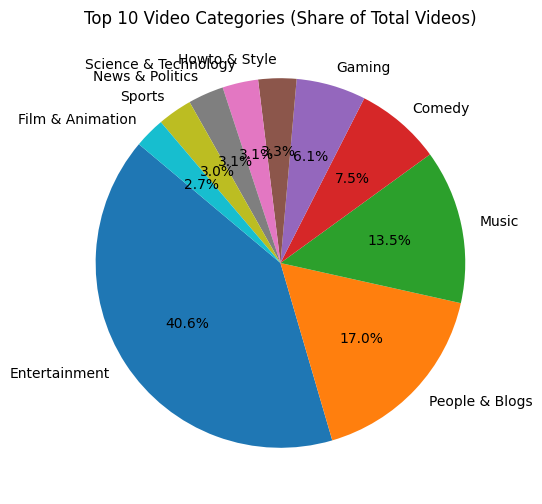

In [ ]:
import matplotlib.pyplot as plt


# Count videos per category
category_counts = df['category_name'].value_counts().head(10)  # top 10 categories

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Video Categories (Share of Total Videos)")
plt.show()




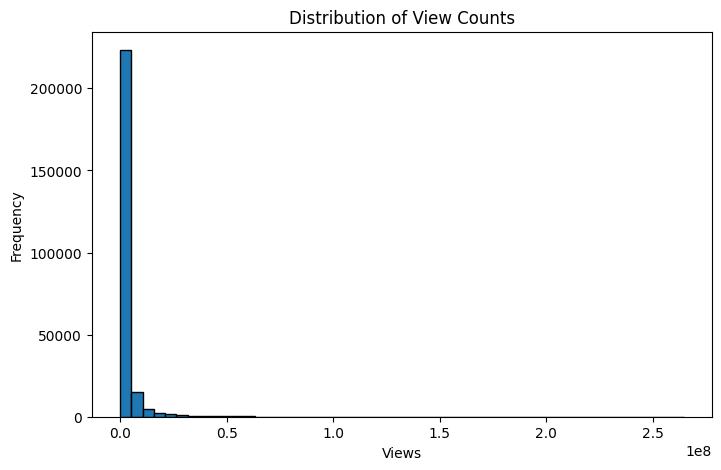

In [ ]:
# Views distribution
plt.figure(figsize=(8,5))
plt.hist(df['view_count'], bins=50, edgecolor="black")
plt.title("Distribution of View Counts")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Top 5 most viewed videos
top_videos = df[['title','channelTitle','view_count','likes','category_name']].sort_values(by='view_count', ascending=False).head(5)
print(top_videos)

# Most liked videos
top_liked = df[['title','channelTitle','likes','view_count','category_name']].sort_values(by='likes', ascending=False).head(5)
print(top_liked)


                                    title    channelTitle  view_count  \
52057    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS   264407389   
3619   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   253995993   
3371   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   244507902   
3122   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   232649205   
2892   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   219110491   

          likes category_name  
52057  16021542         Music  
3619   16115240         Music  
3371   15948359         Music  
3122   15735551         Music  
2892   15460834         Music  
                                    title    channelTitle     likes  \
3619   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  16115240   
52057    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS  16021542   
3371   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  15948359   
3122   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  15735551   
2892   BTS (방탄

In [ ]:
# Correlation between likes, views, comments
print(df[['view_count','likes','dislikes','comment_count']].corr())


               view_count     likes  dislikes  comment_count
view_count       1.000000  0.799752  0.110652       0.458001
likes            0.799752  1.000000  0.069301       0.619059
dislikes         0.110652  0.069301  1.000000       0.151245
comment_count    0.458001  0.619059  0.151245       1.000000


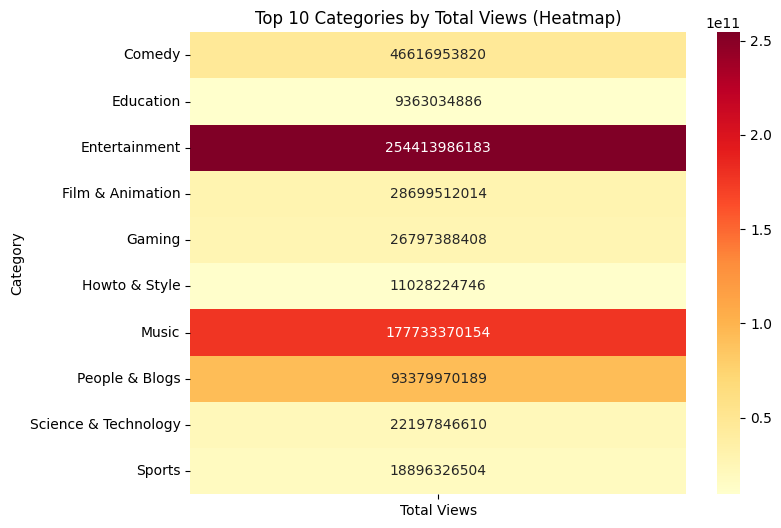

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total views per category
views_per_category = df.groupby('category_name')['view_count'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame for heatmap
views_df = views_per_category.reset_index()
views_df.columns = ['Category', 'Total Views']

plt.figure(figsize=(8,6))
sns.heatmap(views_df.pivot_table(values='Total Views', index='Category'),
            annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Top 10 Categories by Total Views (Heatmap)")
plt.ylabel("Category")
plt.xlabel("")
plt.show()


In [ ]:
# Top 5 most viewed videos
top_videos = df[['title','channelTitle','view_count','likes','category_name']].sort_values(by='view_count', ascending=False).head(5)
print("Top 5 Most Viewed Videos:")
print(top_videos)

# Top 5 most liked videos
top_liked = df[['title','channelTitle','likes','view_count','category_name']].sort_values(by='likes', ascending=False).head(5)
print("\nTop 5 Most Liked Videos:")
print(top_liked)


Top 5 Most Viewed Videos:
                                    title    channelTitle  view_count  \
52057    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS   264407389   
3619   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   253995993   
3371   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   244507902   
3122   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   232649205   
2892   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   219110491   

          likes category_name  
52057  16021542         Music  
3619   16115240         Music  
3371   15948359         Music  
3122   15735551         Music  
2892   15460834         Music  

Top 5 Most Liked Videos:
                                    title    channelTitle     likes  \
3619   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  16115240   
52057    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS  16021542   
3371   BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels  15948359   
3122   BTS (방탄소년단) 'Dynamite' Off

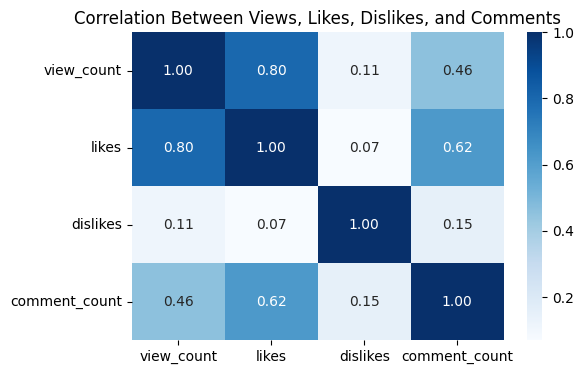

In [ ]:
import seaborn as sns

corr = df[['view_count','likes','dislikes','comment_count']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Views, Likes, Dislikes, and Comments")
plt.show()


In [ ]:
!pip install textblob

from textblob import TextBlob

# Sentiment on titles
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Sentiment on tags
df['tags_sentiment'] = df['tags'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize sentiment (Negative, Neutral, Positive)
def label_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['title_sentiment_label'] = df['title_sentiment'].apply(label_sentiment)
df['tags_sentiment_label'] = df['tags_sentiment'].apply(label_sentiment)

print(df[['title','title_sentiment','title_sentiment_label']].head(10))


                                               title  title_sentiment  \
0  Sadak 2 | Official Trailer | Sanjay | Pooja | ...         0.000000   
1  Kya Baat Aa : Karan Aujla (Official Video) Tan...         0.500000   
2  Diljit Dosanjh: CLASH (Official) Music Video |...         0.000000   
3  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...         0.000000   
4  Baarish (Official Video) Payal Dev,Stebin Ben ...         0.136364   
5                             SISTER DOES MY HAIRCUT         0.000000   
6  Paapi Munda - Mankirt Aulakh Ft. Gur Sidhu | K...         0.136364   
7            Naagin 5 | नागिन 5 | Episode 01 | Recap         0.000000   
8                                Ludo | BakLol Video         0.000000   
9  Jatti Jaandi (Official Video) | Kambi Ft. Mahi...         0.318182   

  title_sentiment_label  
0               Neutral  
1              Positive  
2               Neutral  
3               Neutral  
4              Positive  
5               Neutral  
6             

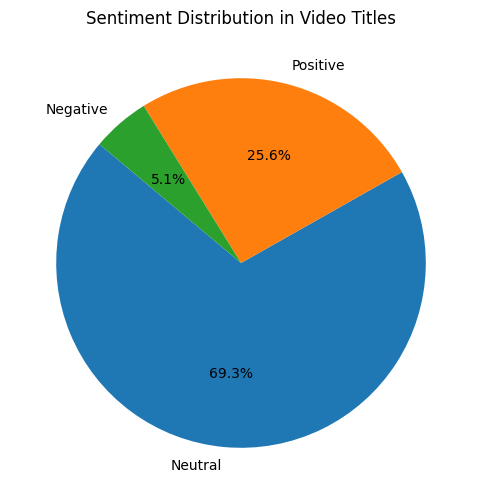

In [ ]:
import matplotlib.pyplot as plt

# Count of sentiment labels
sentiment_counts = df['title_sentiment_label'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution in Video Titles")
plt.show()


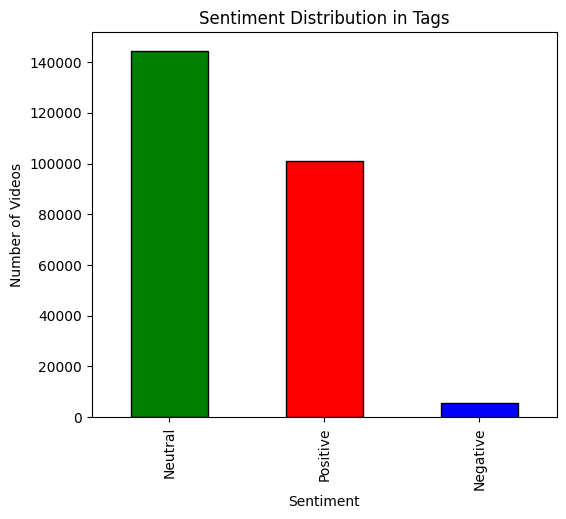

In [ ]:
# Count of tags sentiment
tags_sentiment_counts = df['tags_sentiment_label'].value_counts()

plt.figure(figsize=(6,5))
tags_sentiment_counts.plot(kind='bar', color=['green','red','blue'], edgecolor="black")
plt.title("Sentiment Distribution in Tags")
plt.xlabel("Sentiment")
plt.ylabel("Number of Videos")
plt.show()


In [ ]:
df['trending_date'] = pd.to_datetime(df['trending_date'])


In [ ]:
# For each video, find min & max trending_date
video_trend_duration = df.groupby('video_id').agg(
    first_trend=('trending_date', 'min'),
    last_trend=('trending_date', 'max'),
    title=('title', 'first'),
    channel=('channelTitle', 'first'),
    category=('category_name', 'first')
).reset_index()

# Duration in days
video_trend_duration['trending_days'] = (
    video_trend_duration['last_trend'] - video_trend_duration['first_trend']
).dt.days + 1  # +1 so that single-day counts as 1


In [ ]:
# Top 10 videos that stayed trending longest
top_trending_videos = video_trend_duration.sort_values(by='trending_days', ascending=False).head(10)
print(top_trending_videos[['title','channel','category','trending_days']])


                                                   title              channel  \
24524  Sadak 2 | Official Trailer | Sanjay | Pooja | ...         FoxStarHindi   
56612  Besharam Rang Song | Pathaan | Shah Rukh Khan,...                  YRF   
57463                                #shorts #ashortaday  CHANDAN ART ACADEMY   
34183  KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...        Hombale Films   
4636   Why Children are considered as Gifts of Gods 🕉...     Dushyant kukreja   
44561  Jhoome Jo Pathaan Song | Shah Rukh Khan, Deepi...                  YRF   
8482   KALAASTAR - Full Video | Honey 3.0 | Yo Yo Hon...    Zee Music Company   
51795  Don’t be Oversmart 😎 ~ You Can’t Change your D...     Dushyant kukreja   
59370  Bachpan Ka Pyaar (Official Video) Badshah, Sah...              Badshah   
66967  LEO - Bloody Sweet Promo | Thalapathy Vijay | ...     Sony Music India   

            category  trending_days  
24524  Entertainment             11  
56612          Music            

<Figure size 900x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128329 (\N{OM SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


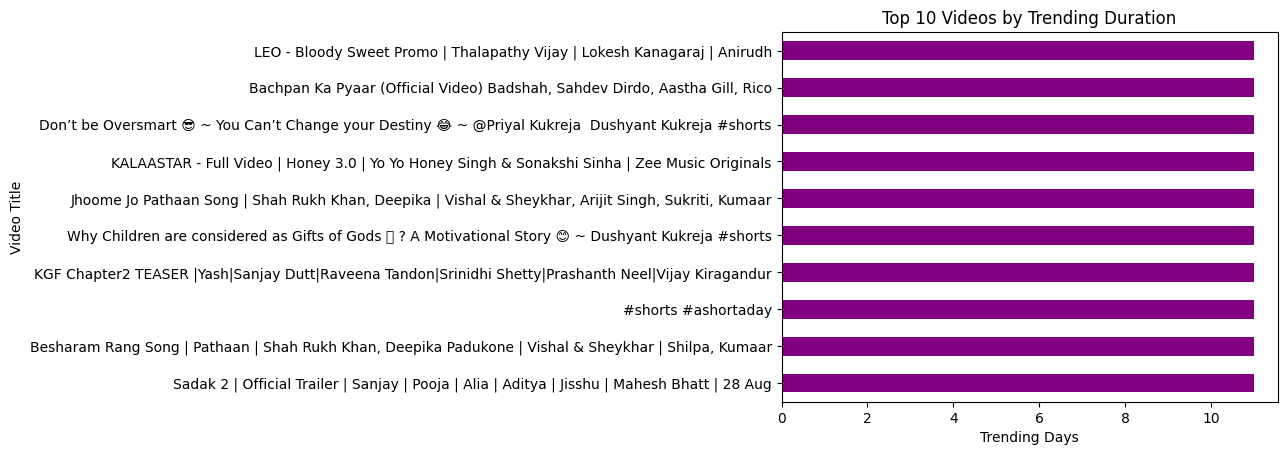

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
top_trending_videos.plot(
    x='title', y='trending_days', kind='barh', color='purple', legend=False
)
plt.xlabel("Trending Days")
plt.ylabel("Video Title")
plt.title("Top 10 Videos by Trending Duration")
plt.show()


In [ ]:
import sqlite3
import pandas as pd

# Create in-memory SQLite DB
conn = sqlite3.connect(':memory:')

# Load DataFrame into SQLite
df.to_sql('youtube_trending', conn, index=False, if_exists='replace')

# SQL Query: Top categories by average views
query = """
SELECT category_name,
       ROUND(AVG(view_count), 2) as avg_views,
       COUNT(*) as video_count
FROM youtube_trending
GROUP BY category_name
ORDER BY avg_views DESC
LIMIT 10;
"""

top_categories_sql = pd.read_sql_query(query, conn)
print(top_categories_sql)


          category_name   avg_views  video_count
0        Pets & Animals  9188947.95          110
1                 Music  5450439.15        32609
2      Film & Animation  4421431.52         6491
3  Science & Technology  2933894.61         7566
4         Entertainment  2589086.40        98264
5                Sports  2586412.06         7306
6                Comedy  2567719.85        18155
7        People & Blogs  2273180.22        41079
8                Gaming  1818621.54        14735
9             Education  1572298.05         5955


In [ ]:
df.to_csv("youtube_trending_cleaned.csv", index=False)


In [ ]:
from google.colab import files
files.download("youtube_trending_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save directly into your Google Drive
df.to_csv("/content/drive/MyDrive/youtube_trending_cleaned.csv", index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
